In [24]:
import numpy as np
import matplotlib.pyplot as plt

import sklearn.neighbors as skl_nb
import sklearn.model_selection as skl_ms
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay




In [71]:
import sys

sys.path.append('../src')

from data_preprocessing import X, y, X_holdout, y_holdout



regular kNN

In [67]:
day_cols = [c for c in X.columns if c.startswith("day_")]
binary_cols = ["snow_or_not", "summertime"]
cols_to_scale = [c for c in X.columns if c not in day_cols + binary_cols]

preprocessor_no_cv = ColumnTransformer(
    transformers=[("scale", StandardScaler(), cols_to_scale)],
    remainder="passthrough",
    force_int_remainder_cols=False
)

knn_no_cv = Pipeline([
    ("preprocess", preprocessor_no_cv),
    ("model", skl_nb.KNeighborsClassifier(n_neighbors=15)),
])

knn_no_cv.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  ['temp', 'dew', 'humidity',
                                                   'precip', 'windspeed',
                                                   'cloudcover', 'visibility',
                                                   'month_sin', 'month_cos',
                                                   'hour_of_day_sin',
                                                   'hour_of_day_cos'])])),
                ('model', KNeighborsClassifier(n_neighbors=15))])

                  precision    recall  f1-score   support

high_bike_demand       0.80      0.58      0.67       238
 low_bike_demand       0.91      0.97      0.94      1042

        accuracy                           0.90      1280
       macro avg       0.85      0.78      0.81      1280
    weighted avg       0.89      0.90      0.89      1280



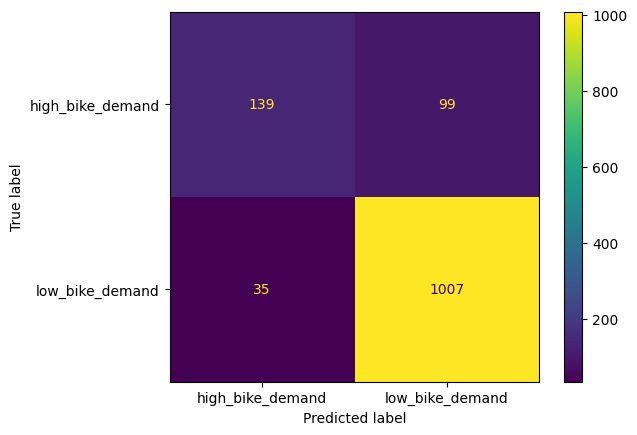

In [68]:
y_pred1 = knn_no_cv.predict(X)

print(classification_report(y, y_pred1))

ConfusionMatrixDisplay.from_predictions(y, y_pred1)
plt.show()

kNN

*Cross validation*
rekommenderas för kNN

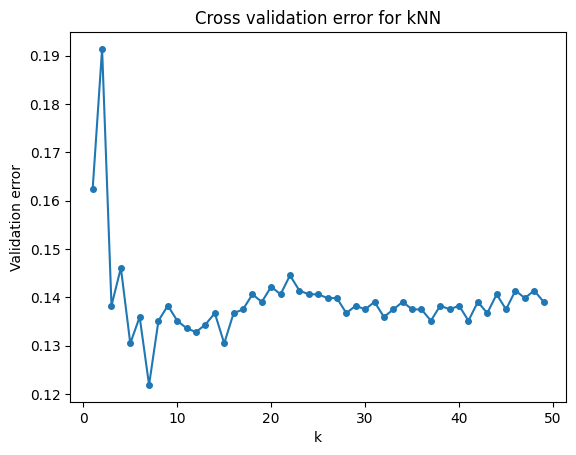

Average accuracy for 2: 0.809
Average accuracy for 3: 0.862
Average accuracy for 4: 0.854
Average accuracy for 5: 0.870
Average accuracy for 6: 0.864
Average accuracy for 7: 0.878
Average accuracy for 8: 0.865
Average accuracy for 9: 0.862
Average accuracy for 10: 0.865


In [29]:
day_cols = [c for c in X.columns if c.startswith("day_")]
binary_cols = ["snow_or_not", "summertime"]
cols_to_scale = [c for c in X.columns if c not in day_cols + binary_cols]

preprocessor = ColumnTransformer(
    transformers=[("scale", StandardScaler(), cols_to_scale)],
    remainder="passthrough",
)

cv = skl_ms.StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
K = np.arange(1, 50)
misclassification = np.zeros(len(K))

for j, k in enumerate(K):
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", skl_nb.KNeighborsClassifier(n_neighbors=k)),
    ])
    scores = skl_ms.cross_val_score(pipeline, X, y, cv=cv)
    misclassification[j] = 1 - np.mean(scores)

plt.plot(K, misclassification, marker='o', markersize=4)
plt.title('Cross validation error for kNN')
plt.xlabel('k')
plt.ylabel('Validation error')
plt.show()

for k_index in range(1,10):
    print(f"Average accuracy for {k_index + 1}: {1 - misclassification[k_index]:.3f}")

k=1: high=0.57143, low=0.89827
k=2: high=0.74370, low=0.82342
k=3: high=0.56723, low=0.92898
k=4: high=0.67647, low=0.89443
k=5: high=0.56303, low=0.93954
k=6: high=0.65126, low=0.91267
k=7: high=0.57143, low=0.94818
k=8: high=0.61345, low=0.92226
k=9: high=0.50840, low=0.94242


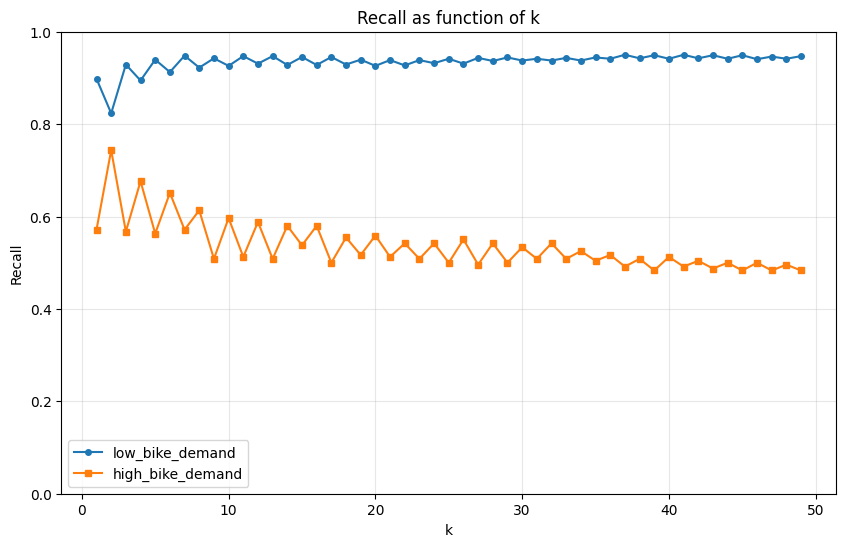

In [53]:
K = np.arange(1, 50)
recall_low = []
recall_high = []

for k in K:
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", skl_nb.KNeighborsClassifier(n_neighbors=k)),
    ])
    y_pred = cross_val_predict(pipeline, X, y, cv=cv)
    report = classification_report(y, y_pred, output_dict=True)
    
    recall_low.append(report.get("low_bike_demand", {}).get("recall", 0))
    recall_high.append(report.get("high_bike_demand", {}).get("recall", 0))

for k_value in range(1, 10):
    k_index = k_value - 1
    print(f"k={k_value}: high={recall_high[k_index]:.5f}, low={recall_low[k_index]:.5f}")

plt.figure(figsize=(10, 6))
plt.plot(K, recall_low, label="low_bike_demand", marker='o', markersize=4)
plt.plot(K, recall_high, label="high_bike_demand", marker='s', markersize=4)
plt.title("Recall as function of k")
plt.xlabel("k")
plt.ylabel("Recall")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [59]:
kNN = Pipeline([
    ("preprocess", preprocessor),
    ("model", skl_nb.KNeighborsClassifier(n_neighbors=6))
])

y_pred = cross_val_predict(kNN, X, y, cv=cv)


                  precision    recall  f1-score   support

high_bike_demand       0.63      0.65      0.64       238
 low_bike_demand       0.92      0.91      0.92      1042

        accuracy                           0.86      1280
       macro avg       0.77      0.78      0.78      1280
    weighted avg       0.87      0.86      0.86      1280



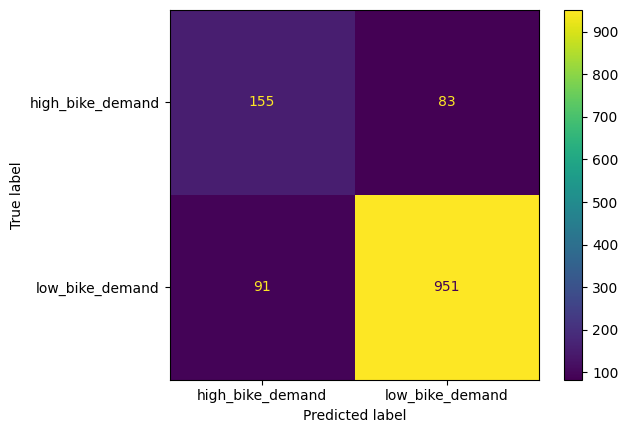

In [60]:
print(classification_report(y, y_pred))

ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()